In [ ]:
import regex as re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functools import reduce
import difflib
import random as rand
rand.seed(10) # Don't change this!

In [ ]:
with open("pattern.txt", "r") as f:
    pat = re.compile(f.read())


text_file = "tweeteval/datasets/stance/abortion/train_text.txt"

with open(text_file, "r") as f:
    text = f.read()

corpus = re.findall(pat, text)

In [ ]:
def tokenize(pat, text):
    return re.findall(pat, text)


def statistics(corpus):
    counts = Counter(corpus)
    corpus_size = len(corpus)
    vocab_size = len(counts)
    return (counts, corpus_size, vocab_size, vocab_size/corpus_size)

In [ ]:
def zipf(corpus):
    voc = Counter(corpus)
    frq = pd.DataFrame(voc.most_common(), columns=['token', 'frequency'])

    # Index in the sorted list
    frq['idx'] = frq.index + 1

    # Frequency normalised by corpus size
    frq['norm_freq'] = frq.frequency / len(corpus)

    # Cumulative normalised frequency
    frq['cumul_frq'] = frq.norm_freq.cumsum()

    sns.set_theme(style='whitegrid')

    # Plot: Cumulative frequency by index
    sns.relplot(x='idx', y='cumul_frq', data=frq)
    plt.show()

    # Plot: Cumulative frequency by index, top 10000 tokens
    sns.relplot(x='idx', y='cumul_frq', data=frq[:10000], kind='line')
    plt.show()

    # Plot: Log-log plot for Zipf's law
    frq['log_frq'] = np.log(frq.frequency)
    frq['log_rank'] = np.log(frq.frequency.rank(ascending=False))
    sns.relplot(x='log_rank', y='log_frq', data=frq)
    plt.show()

In [ ]:
# 2 Characterising your data

#• Corpus size, vocabulary size, type/token ratio.

irony_list = []
with open("tweeteval/datasets/irony/test_text.txt", "r") as f:
    irony_text = f.read()

irony_corpus = tokenize(pat, irony_text)
statistics(irony_corpus)
def datfr(corpus):
    voc = Counter(corpus)
    frq = pd.DataFrame(voc.most_common(), columns=['token', 'frequency'])

    # Index in the sorted list
    frq['idx'] = frq.index + 1

    # Frequency normalised by corpus size
    frq['norm_freq'] = frq.frequency / len(corpus)

    # Cumulative normalised frequency
    frq['cumul_frq'] = frq.norm_freq.cumsum()
    sns.set_theme(style='whitegrid')
    return(frq)
datfr(irony_corpus)

,token,frequency,idx,norm_freq,cumul_frq
0,@user,465,1,0.041110,0.041110
1,the,301,2,0.026611,0.067722
2,to,244,3,0.021572,0.089294
3,a,217,4,0.019185,0.108478
4,I,180,5,0.015914,0.124392
...,...,...,...,...,...
4165,📚,1,4166,0.000088,0.999646
4166,📖,1,4167,0.000088,0.999735
4167,#Stop,1,4168,0.000088,0.999823
4168,Labeling,1,4169,0.000088,0.999912


Abortion
Corpus size: Counter({'#SemST': 280, '@user': 174, 'the': 120, 'to': 86, 'of': 72, 'a': 70, 'is': 63, 'I': 60, 'in': 57, 'you': 46, 'that': 44, 'and': 42, 'for': 40, 'are': 39, 'with': 34, 'be': 32, 'have': 32, 'not': 31, 'abortion': 29, 'women': 27, 'it': 27, "don't": 24, 'your': 22, 'at': 21, 'they': 21, 'life': 21, 'as': 20, 'if': 20, 'on': 19, 'who': 19, 'an': 18, 'about': 18, 'can': 17, 'by': 17, 'all': 16, 'this': 16, 'people': 16, 'their': 16, 'do': 15, 'choice': 15, 'we': 14, 'right': 14, 'my': 14, 'The': 14, 'no': 14, 'pregnant': 13, 'when': 13, 'laws': 13, 'or': 13, 'more': 12, 'just': 12, 'because': 11, 'birth': 11, 'what': 11, 'A': 11, 'say': 11, "I'm": 11, 'should': 11, 'would': 10, 'but': 10, 'babies': 10, '2': 10, 'child': 10, 'these': 10, 'support': 10, 'only': 10, 'kill': 10, 'know': 10, 'get': 9, 'one': 9, 'want': 9, 'has': 9, 'from': 9, 'even': 9, 'our': 9, 'men': 9, 'never': 8, 'so': 8, 'been': 8, 'If': 8, 'u': 8, 'make': 8, 'me': 8, 'human': 8, 'unborn': 8

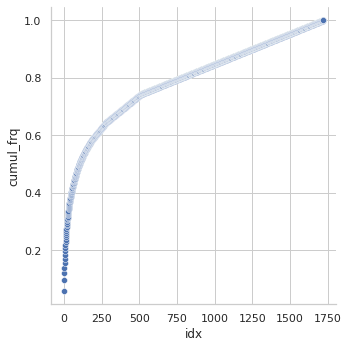

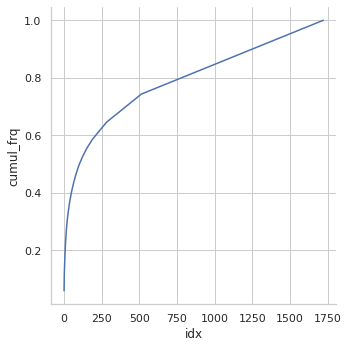

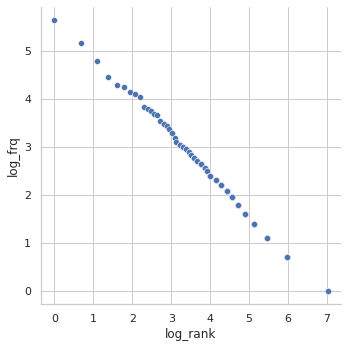

Atheism
Corpus size: Counter({'#SemST': 220, 'the': 105, 'to': 91, 'and': 84, 'is': 68, '@user': 59, 'of': 58, 'a': 57, 'I': 50, 'in': 48, 'you': 46, 'for': 42, 'that': 38, 'God': 35, 'be': 29, 'all': 24, 'not': 24, 'your': 24, 'me': 23, 'my': 21, 'it': 19, 'on': 19, 'are': 19, 'will': 19, 'we': 19, 'with': 19, '#God': 18, 'but': 17, 'have': 16, 'has': 16, 'who': 15, 'The': 15, 'this': 14, 'as': 14, 'what': 13, 'good': 12, 'love': 12, 'he': 11, 'from': 11, 'our': 11, 'us': 11, 'like': 11, 'life': 11, 'do': 11, 'RT': 10, 'them': 10, 'religion': 10, 'by': 10, 'when': 10, 'time': 9, 'just': 9, 'Lord': 9, 'they': 9, 'world': 8, 'an': 8, 'We': 8, 'at': 8, '#freethinker': 7, 'faith': 7, 'My': 7, 'am': 7, 'can': 7, 'out': 7, 'no': 7, 'his': 7, 'so': 7, "can't": 7, 'because': 6, 'go': 6, 'never': 6, 'how': 6, 'Jesus': 6, 'people': 6, 'You': 6, 'believe': 6, 'most': 6, 'every': 6, "don't": 6, 'man': 6, 'their': 6, 'may': 6, 'live': 6, 'him': 6, 'way': 6, 'He': 5, 'become': 5, 'soul': 5, 'withou

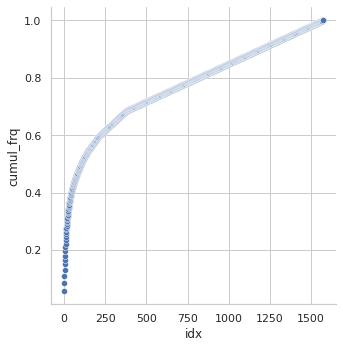

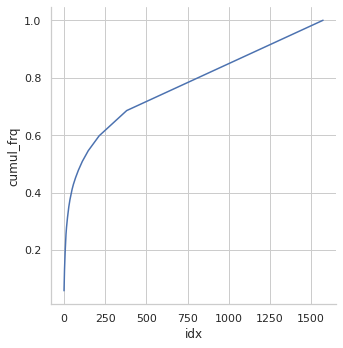

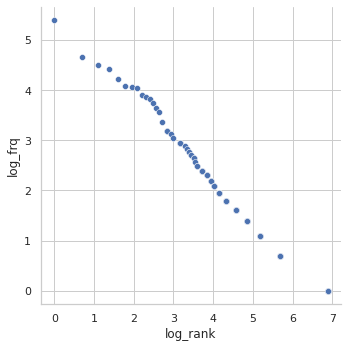

Climate
Corpus size: Counter({'#SemST': 169, '@user': 102, 'the': 86, 'to': 80, 'is': 43, 'in': 43, 'of': 42, 'a': 34, 'and': 26, 'on': 25, 'for': 20, 'we': 19, 'be': 17, '#CFCC15': 16, 'our': 16, 'this': 16, 'are': 15, 'change': 15, 'I': 14, 'climate': 14, 'not': 13, 'you': 12, 'have': 12, 'at': 12, 'about': 12, 'that': 12, 'with': 12, 'will': 11, 'by': 11, 'from': 11, 'more': 10, 'your': 10, 'can': 9, 'We': 9, 'has': 9, 'when': 8, 'all': 8, 'so': 8, 'only': 8, 'it': 8, '#Climate': 8, 'summer': 7, 'need': 7, '#Tip': 7, "it's": 7, 'The': 7, '#CSOTA': 7, 'than': 6, 'what': 6, '#Mission': 6, 'was': 6, 'degrees': 6, 'or': 6, 'they': 5, 'What': 5, 'as': 5, 'weather': 5, 'heat': 5, 'species': 5, 'me': 5, 'an': 5, 'how': 5, 'Climate': 5, 'my': 5, 'here': 5, 'global': 5, 'but': 5, 'earth': 5, 'like': 5, '#COP21': 5, '#auspol': 5, 'going': 5, '#environment': 5, 'Still': 5, 'If': 5, 'some': 4, 'do': 4, 'It': 4, 'just': 4, 'get': 4, 'emissions': 4, 'their': 4, 'out': 4, 'over': 4, 'would': 4, "d

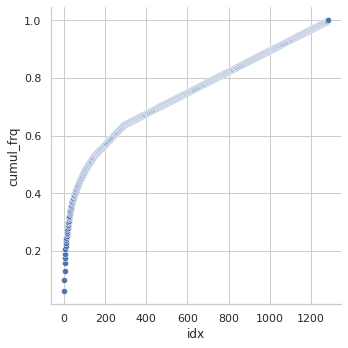

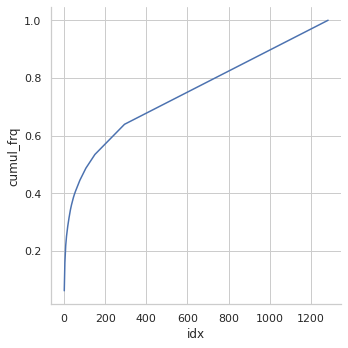

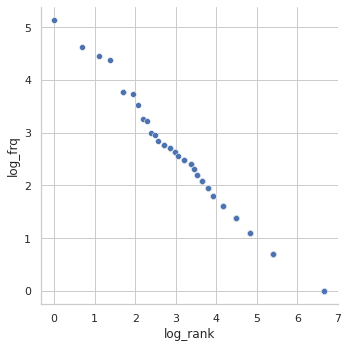

Feminist
Corpus size: Counter({'#SemST': 285, 'a': 124, 'to': 115, '@user': 115, 'the': 112, 'I': 75, 'is': 69, 'of': 66, 'and': 64, 'in': 53, 'for': 48, 'are': 47, 'you': 44, 'be': 41, 'that': 36, 'women': 35, 'not': 34, 'men': 33, 'it': 31, 'like': 28, 'have': 26, 'with': 25, 'feminist': 24, 'they': 24, 'me': 23, 'my': 23, 'but': 22, 'your': 21, 'this': 20, 'woman': 19, 'when': 18, 'people': 18, 'feminists': 17, 'an': 17, 'what': 17, 'about': 17, 'get': 16, 'because': 16, 'all': 16, 'would': 16, 'on': 16, 'their': 15, 'The': 15, '#feminist': 15, 'if': 15, 'can': 14, 'feminism': 14, 'should': 14, "I'm": 14, "don't": 13, 'do': 13, 'how': 12, '#equality': 12, 'If': 12, 'need': 12, 'being': 12, '#GamerGate': 12, 'from': 11, 'who': 11, 'as': 11, 'man': 11, 'we': 11, 'equality': 11, 'more': 11, 'at': 11, 'girls': 11, 'or': 10, 'u': 10, 'just': 10, 'one': 10, 'no': 10, 'out': 10, 'want': 10, 'has': 10, 'so': 10, 'Feminists': 9, 'were': 9, 'see': 9, 'A': 9, 'gender': 9, "it's": 9, 'up': 9, '

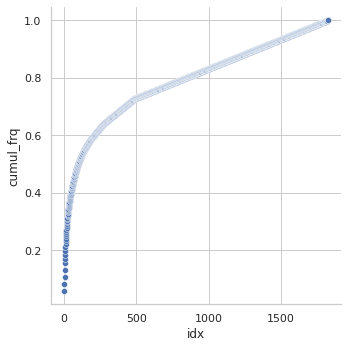

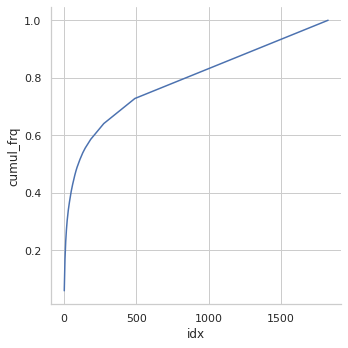

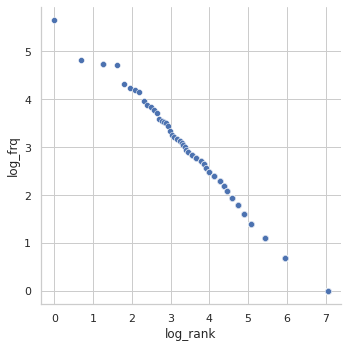

Hillary
Corpus size: Counter({'#SemST': 295, '@user': 264, 'the': 135, 'to': 106, 'a': 77, 'of': 65, 'is': 64, 'I': 56, 'and': 54, 'for': 45, 'her': 44, 'in': 40, 'you': 38, 'Hillary': 35, 'it': 34, 'be': 29, 'on': 28, 'that': 28, 'as': 23, 'she': 21, 'will': 20, 'about': 19, 'we': 18, 'not': 18, 'The': 17, 'just': 17, '#HillaryClinton': 16, 'do': 16, 'has': 16, 'all': 16, 'are': 15, 'like': 15, 'so': 15, 'your': 15, 'get': 14, 'no': 14, 'this': 13, '#tcot': 13, 'at': 13, 'more': 13, 'with': 13, 'was': 12, 'if': 12, 'than': 12, 'from': 11, 'their': 11, 'now': 11, '#Benghazi': 11, 'when': 11, "I'm": 11, 'who': 11, 'need': 10, 'people': 10, 'my': 10, 'can': 10, 'Clinton': 10, 'time': 9, 'but': 9, 'have': 9, 'one': 9, "it's": 9, 'he': 9, 'interview': 9, 'follow': 9, 'should': 8, 'what': 8, '2': 8, '#WakeUpAmerica': 8, 'by': 8, 'does': 8, 'candidate': 8, 'woman': 8, '#freeallfour': 8, 'want': 8, 'support': 8, 'they': 8, 'campaign': 8, 'going': 8, 'much': 8, 'me': 8, 'This': 7, 'way': 7, 'o

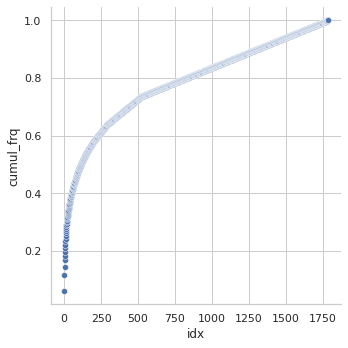

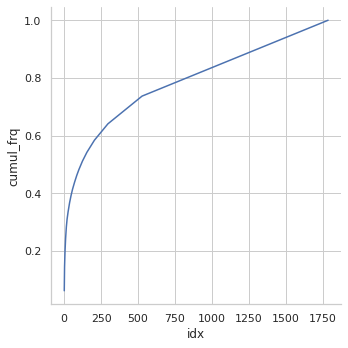

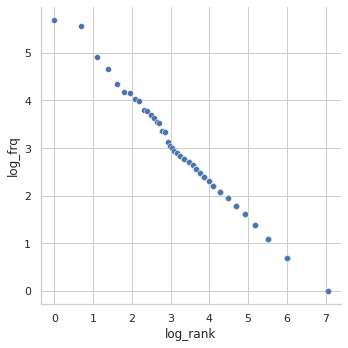

In [ ]:
stances = ["abortion", "atheism", "climate", "feminist", "hillary"]
stance_texts = []
for stance in stances:
    with open(f"tweeteval/datasets/stance/{stance}/test_text.txt") as f:
        stance_texts.append(f.read())
for text, stance in zip(stance_texts, stances):
    print(stance.title())
    corpus = tokenize(pat, text)
    stats = statistics(corpus)
    print(f"Corpus size: {stats[0]}\tDictionary size: {stats[1]}\tType/token ratio: {stats[2]:.3}")
    print(datfr(corpus).head(10))
    print()
    zipf(corpus)

In [ ]:
# 3 Manual Annotation and Inter-Annotator Agreement

In [ ]:
lines = []

with open("tweeteval/datasets/irony/train_text.txt") as f:
    for line in f:
        lines.append(line.strip())

to_manual = random.choices(lines, k=100) # Vi skal også have index på, så vi kan tjekke op senere.

with open("manual_annotation.txt", "w") as f:
    for line in to_manual:
        f.write(line)
        f.write("\n")

$$
    \underbrace{\stackrel{1}{\text{in}}\quad\stackrel{2}{\text{the}}}_{\stackrel{\text{bigram}}{\text{2-gram}}}
    \qquad p(\text{the} \;|\; \underbrace{\phantom{text}\text{in}\phantom{text}}_{\text{firstorder MM}})
$$

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e4cdc3a5-dd4a-4d72-a71a-972cea883107' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>